# 1. Exploration et présentation générale du jeu de données

> Création du dataFrame **data_df** à partir du fichier p2-arbres-fr.csv

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import missingno as msno
sns.set()


data = pd.read_csv("p2-arbres-fr.csv",sep=';')
data_df = pd.DataFrame(data,
                    columns = ['type_emplacement','domanialite','arrondissement','complement_addresse',
                                                      'numero','lieu','id_emplacement','libelle_francais','genre','espece','variete','circonference_cm',
                'hauteur_m','stade_developpement','remarquable','geo_point_2d_a','geo_point_2d_b'])


## a) Affichage des lignes en début de fichier

In [2]:
data_df.head()

,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## b) Affichage des colonnes et lignes, ansi que leurs nombres

In [3]:
print('Nombre de lignes du fichier   : ',data_df.shape[0])
print('Nombre de colonnes du fichier : ',data_df.shape[1])

Nombre de lignes du fichier   :  200137
Nombre de colonnes du fichier :  17


## c) Affichage du nombre de valeurs manquantes pour chaque colonne


In [4]:
nb_col_nan = data_df.isnull().sum()
nb_col_nan

type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

> On peut définir le pourcentage de données manquantes dans notre dataset :

In [5]:
nb_tot_cells_df = np.product(data_df.shape)
nb_tot_cells_manq = nb_col_nan.sum()

pct = (nb_tot_cells_manq / nb_tot_cells_df) * 100
print(pct)

19.5836734190021


> On a pratiquement **19.6%** des cellules de notre jeu de données manquantes,ce qui n'est pas négligeable.

## d) Représentation graphique des données 

* Affichage d'indicateurs statistiques : 

In [6]:
data_df.describe(include="all")

,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000
unique,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838


> On remarque que les valeurs max des colonnes **circonference_cm et hauteur_m**
  sont aberrantes. On le constate de manière plus claire lorsqu on représente la distribution
  de ces variables.
  
  
* Distribution de la variable **circonference_cm** :

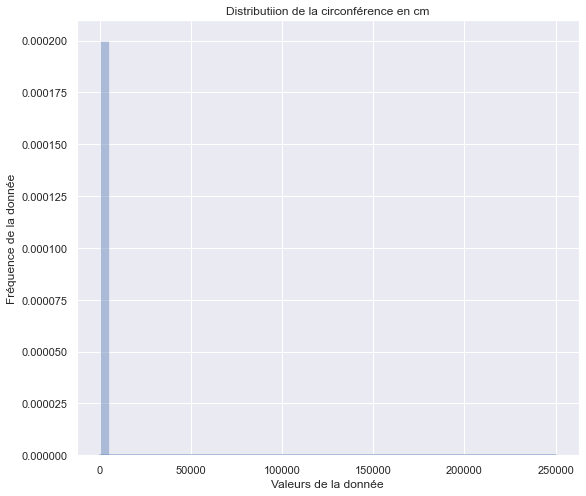

Indicateurs statistiques :

Moyenne:
 83.38047937163043
Médiane:
 70.0
Mode:
 0    0
dtype: int64
Variance:
 453182.7985091447
Ecart type:
 673.188531177667
Skewness:
 298.1566142744793
Kurtosis:
 101767.73808968415


In [7]:
# distribution
plt.figure(figsize = (9, 8))
sns.distplot(data_df['circonference_cm'], kde=True)
plt.title ("Distributiion de la circonférence en cm")
plt.ylabel ("Fréquence de la donnée")
plt.xlabel ("Valeurs de la donnée")
plt.show()

subset = data_df['circonference_cm']
print("Indicateurs statistiques :\n")
print("Moyenne:\n",subset.mean())
print("Médiane:\n",subset.median())
print("Mode:\n",subset.mode())
print("Variance:\n",subset.var(ddof=0))
print("Ecart type:\n",subset.std(ddof=0))
print("Skewness:\n",subset.skew())
print("Kurtosis:\n",subset.kurt())


> On observe une asymétrie de la distribution vers la droite avec des valeurs aberrantes au delà de <font color='green'>1000 cm</font>
  de circonférence étant donné que l'arbre le plus gros de Paris fait <font color='green'>800 cm</font> de circonférence.

* Distribution de la variable **hauteur_m** :

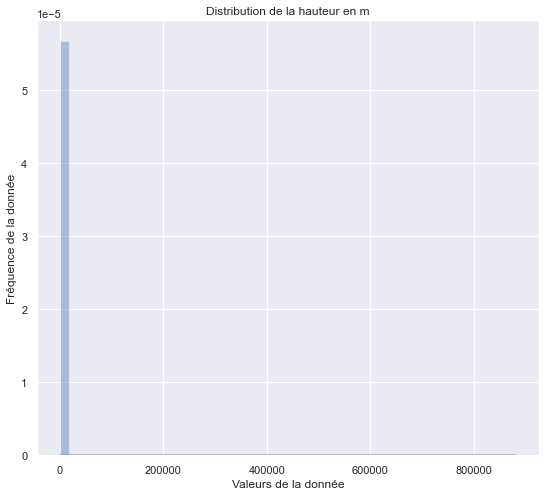

Indicateurs statistiques :

Moyenne:
 13.110509301128728
Médiane:
 8.0
Mode:
 0    0
dtype: int64
Variance:
 3885678.570015372
Ecart type:
 1971.2124619166175
Skewness:
 447.2941319705096
Kurtosis:
 200093.61002658578


In [8]:
# Distribution
plt.figure(figsize = (9, 8))
sns.distplot(data_df['hauteur_m'], kde=True)
plt.title ("Distribution de la hauteur en m")
plt.ylabel ("Fréquence de la donnée")
plt.xlabel ("Valeurs de la donnée")
plt.show()

subset = data_df['hauteur_m']
print("Indicateurs statistiques :\n")
print("Moyenne:\n",subset.mean())
print("Médiane:\n",subset.median())
print("Mode:\n",subset.mode())
print("Variance:\n",subset.var(ddof=0))
print("Ecart type:\n",subset.std(ddof=0))
print("Skewness:\n",subset.skew())
print("Kurtosis:\n",subset.kurt())

> On observe une asymétrie de la distribution des hauteurs vers la droite avec des valeurs aberrantes au delà de <font color='green'>66 m</font> de hauteur étant donné que l'arbre le plus haut de France fait <font color='green'>66 m</font>.

* Distribution de la variable **geo_point_2d_a** :

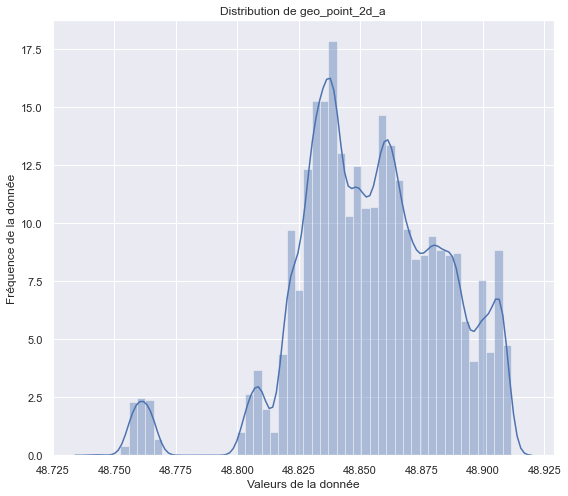

Indicateurs statistiques :

Moyenne:
 48.854490789013816
Médiane:
 48.8541620874
Mode:
 0     48.757837
1     48.758683
2     48.829328
3     48.829912
4     48.832351
5     48.833321
6     48.833919
7     48.836019
8     48.836416
9     48.836862
10    48.837168
11    48.838318
12    48.838539
13    48.838550
14    48.839118
15    48.839561
16    48.843660
17    48.847881
18    48.848102
19    48.848812
20    48.857796
21    48.872672
22    48.879931
23    48.882277
24    48.883193
25    48.887740
26    48.900253
27    48.900290
28    48.900332
29    48.907786
dtype: float64
Variance:
 0.0009140989860423769
Ecart type:
 0.030234069954975906
Skewness:
 -0.5077801665105312
Kurtosis:
 0.8495487070564152


In [9]:
# Distribution
plt.figure(figsize = (9, 8))
sns.distplot(data_df['geo_point_2d_a'], kde=True)
plt.title ("Distribution de geo_point_2d_a")
plt.ylabel ("Fréquence de la donnée")
plt.xlabel ("Valeurs de la donnée")
plt.show()

subset = data_df['geo_point_2d_a']
print("Indicateurs statistiques :\n")
print("Moyenne:\n",subset.mean())
print("Médiane:\n",subset.median())
print("Mode:\n",subset.mode())
print("Variance:\n",subset.var(ddof=0))
print("Ecart type:\n",subset.std(ddof=0))
print("Skewness:\n",subset.skew())
print("Kurtosis:\n",subset.kurt())

> On observe une asymétrie de la distribution vers la gauche comme en témoigne le skewness empirique négatif <font color='green'>-0.507</font>. On pourra se limiter à l'intervalle <font color='green'>[48.8,...]</font>. En dessous de <font color='green'>48.8</font>, on considère ces valeurs comme atypiques.

* Distribution de la variable **geo_point_2d_b** :

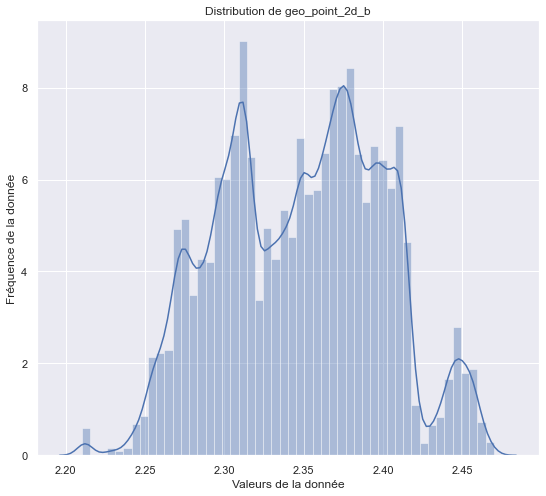

Indicateurs statistiques :

Moyenne:
 2.3482078955462873
Médiane:
 2.3510951657
Mode:
 0     2.270804
1     2.275815
2     2.298566
3     2.299317
4     2.310379
5     2.311181
6     2.336083
7     2.337371
8     2.374324
9     2.386441
10    2.386442
11    2.386444
12    2.387348
13    2.391491
14    2.397988
15    2.406610
16    2.438810
17    2.439268
18    2.439350
19    2.439665
20    2.446210
21    2.446277
22    2.446518
dtype: float64
Variance:
 0.002623438375630682
Ecart type:
 0.05121951166919382
Skewness:
 -0.01009106915664587
Kurtosis:
 -0.7266172544200509


In [10]:
# Distribution
plt.figure(figsize = (9, 8))
sns.distplot(data_df['geo_point_2d_b'], kde=True)
plt.title ("Distribution de geo_point_2d_b")
plt.ylabel ("Fréquence de la donnée")
plt.xlabel ("Valeurs de la donnée")
plt.show()

subset = data_df['geo_point_2d_b']
print("Indicateurs statistiques :\n")
print("Moyenne:\n",subset.mean())
print("Médiane:\n",subset.median())
print("Mode:\n",subset.mode())
print("Variance:\n",subset.var(ddof=0))
print("Ecart type:\n",subset.std(ddof=0))
print("Skewness:\n",subset.skew())
print("Kurtosis:\n",subset.kurt())

> On observe une légère asymétrie de la distribution mais non significative. De plus, elle est plus aplatie que la distribution normale car le kurtosis empirique est négatif. On n'a pas de valeurs aberrantes ou atypiques.

> <font color='red'>CONCLUSION</font>

>  <font color='red'>Probablement que ces valeurs aberrantes de la hauteur ou de la circonférence peuvent                               provenir d'une erreur de saisie manuelle ou de la manipulation de ces données lors de la                           production du fichier **p2-arbres-fr.csv** (comme une extraction ou une conversion).            </font>


---

## 2. Nettoyage et traitement des données

## a) Suppression et substitution

* On peut utliser le package **missingno** qui permet de visualiser les données manquantes dans les        différentes colonnes de notre dataframe **data_df**: 

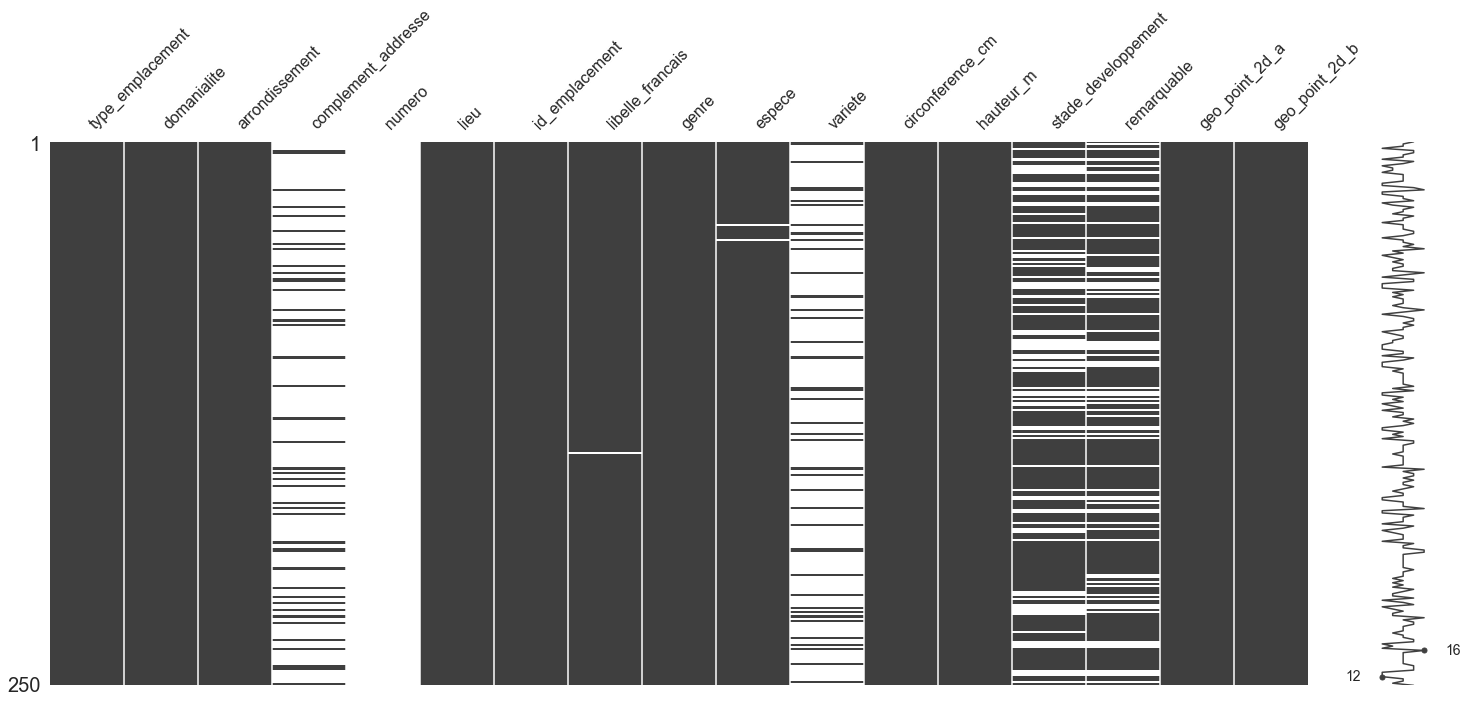

In [11]:
msno.matrix(data_df.sample(250))

> On remarque que les colonnes **complement_adresse, numero, variete** 
  sont pratiquement vides et les colonnes **stade_developpement, remarquable** 
    ont quelques cellules vides.
    
> Les colonnes **complement_adresse** et **numero** contiennent beaucoup trop de données manquantes.
  De ce fait, ces colonnes sont inutiles étant donné que la colonne **lieu** précise l'adresse des arbres,on va
  donc les supprimer(ainsi que la colonne **variete**).

> La meilleur solution est de **remplir automatiquement** 
les cellules manquantes dans les colonnes **stade_developpement et remarquable**.


* Suppression des colonnes **complement_adresse, numero, variete** 

In [12]:
for c in data_df.columns:
    if c not in ['type_emplacement','domanialite','arrondissement','lieu','id_emplacement','libelle_francais','genre','espece','circonference_cm',
                'hauteur_m','stade_developpement','remarquable','geo_point_2d_a','geo_point_2d_b']:
        del data_df[c]
        print('Suppression de la colonne : {}'.format(c))

Suppression de la colonne : complement_addresse
Suppression de la colonne : numero
Suppression de la colonne : variete


* On va remplacer les cellules manquantes de la colonne **remarquable** par 0 et pour la colone      **stade_developpement**, on remplace les cellules vides
  par les cellules précédentes 

In [13]:
data_df = data_df.fillna(value={"remarquable": 0})
     
data_df[['stade_developpement']] = data_df[['stade_developpement']].fillna(method='bfill')

* On traite la circonference_cm et la hauteur à 0 par les moyennes de chaque donnée en ne prenant en compte que les circonférences inférieures à 800 cm et les hauteurs inférieures à 66m :

In [14]:
data_df_autres = data_df.query('circonference_cm > 800 or hauteur_m > 66')
data_df = data_df.query('circonference_cm < 800 and hauteur_m < 66')

moyenne_circ = data_df[data_df.circonference_cm.abs() < 800]['circonference_cm'].mean()
data_df.loc[data_df.circonference_cm == 0,'circonference_cm'] = moyenne_circ

moyenne_haut = data_df[data_df.hauteur_m.abs() < 66]['hauteur_m'].mean()
data_df.loc[data_df.hauteur_m == 0,'hauteur_m'] = moyenne_haut

## b) Représentation graphique des données après nettoyage

* Affichage d'indicateurs statistiques après le nettoyage : 


In [15]:
data_df.describe(include="all")

,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,199706,199705,199706,199706,199706,198210,199690,197955,199706.000000,199706.000000,198435,199706.000000,199706.000000,199706.000000
unique,1,9,25,6920,68997,192,175,539,NaN,NaN,4,NaN,NaN,NaN
top,Arbre,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,NaN,NaN,A,NaN,NaN,NaN
freq,199706,104750,17139,2990,1323,42408,42491,36338,NaN,NaN,92828,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.010974,9.995189,NaN,0.000911,48.854523,2.348214
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.133580,4.827314,NaN,0.030175,0.030235,0.051247
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,48.742290,2.210241
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,7.000000,NaN,0.000000,48.835057,2.307495
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.689198,8.354536,NaN,0.000000,48.854199,2.351172
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876486,2.386879


* Affichage des colonnes après le nettoyage : 

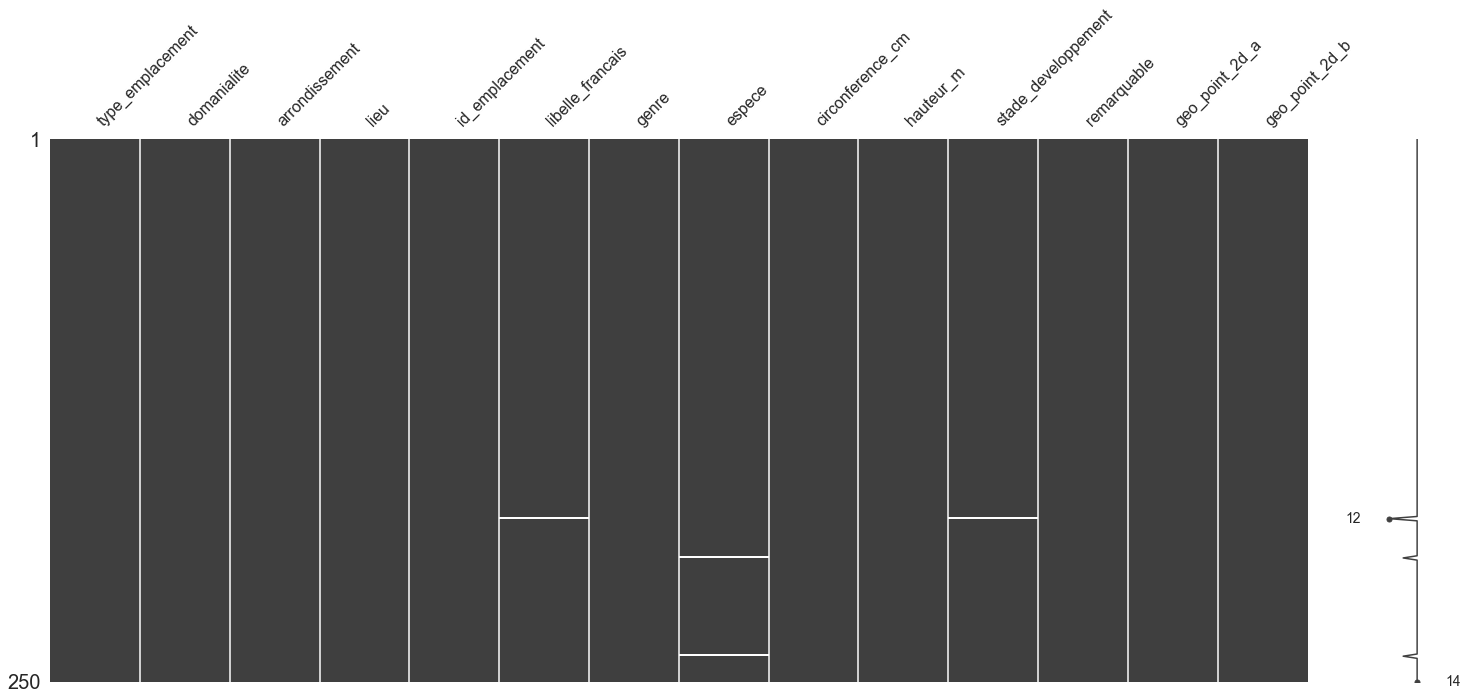

In [16]:
msno.matrix(data_df.sample(250))

* Affichage des distributions après le nettoyage : 

In [17]:
data_df_num = data_df.select_dtypes(include = ['float64', 'int64'])
data_df_num = data_df_num.query('circonference_cm < 800 and hauteur_m < 66')
mycolumns = ['circonference_cm','hauteur_m','geo_point_2d_a','geo_point_2d_b'] 
data_df_num_1 = data_df_num[mycolumns]
data_df_num_1.head()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
0,20.0,5.000000,48.857620,2.320962
1,65.0,8.000000,48.857656,2.321031
2,90.0,10.000000,48.857705,2.321061
3,60.0,8.000000,48.857722,2.321006
4,38.0,8.354536,48.890435,2.315289


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dac4490>,
      dtype=object)

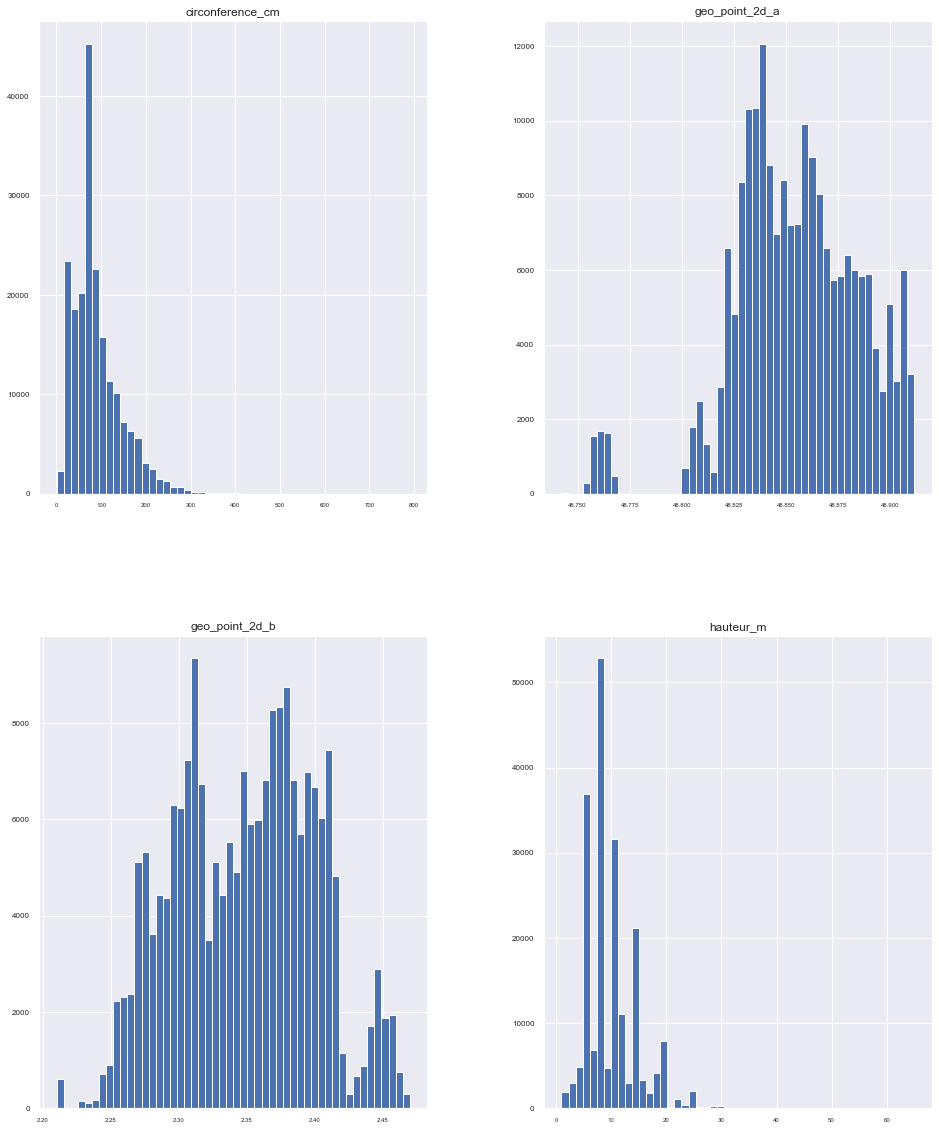

In [18]:
data_df_num_1.hist(figsize=(16, 20), bins=50, xlabelsize=6, ylabelsize=8)

* Pour la donnée remarquable :

In [19]:
nb_tot_rem_0 = data_df[data_df.remarquable == 0]['remarquable'].value_counts()

pct_rem_0 = (nb_tot_rem_0 / data_df.shape[0]) * 100
print(pct_rem_0)

0.0    99.908866
Name: remarquable, dtype: float64


> La donnée **remarquable** contient <font color='red'>99.908%</font> de cellules contenant 0.0

> <font color='red'>ANALYSE</font>


>  <font color='red'> Les données circonference_cm, hauteur semblent avoir la même distribution           </font>

## c) Affichage des autres arbres 

* Distributions des autres arbres de circonférence > 800cm et de hauteur > 66m : 



In [20]:
data_df_aut_num = data_df_autres.select_dtypes(include = ['float64', 'int64'])
mycolumns = ['circonference_cm','hauteur_m','geo_point_2d_a','geo_point_2d_b'] 
data_df_num_aut_1 = data_df_aut_num[mycolumns]
data_df_num_aut_1.head()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
5264,2439,19,48.855220,2.300782
5392,100,1510,48.855044,2.301780
5599,41,68,48.856190,2.296125
5717,1133,10,48.824110,2.336454
5979,1138,15,48.855565,2.296204


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e65edc0>,
      dtype=object)

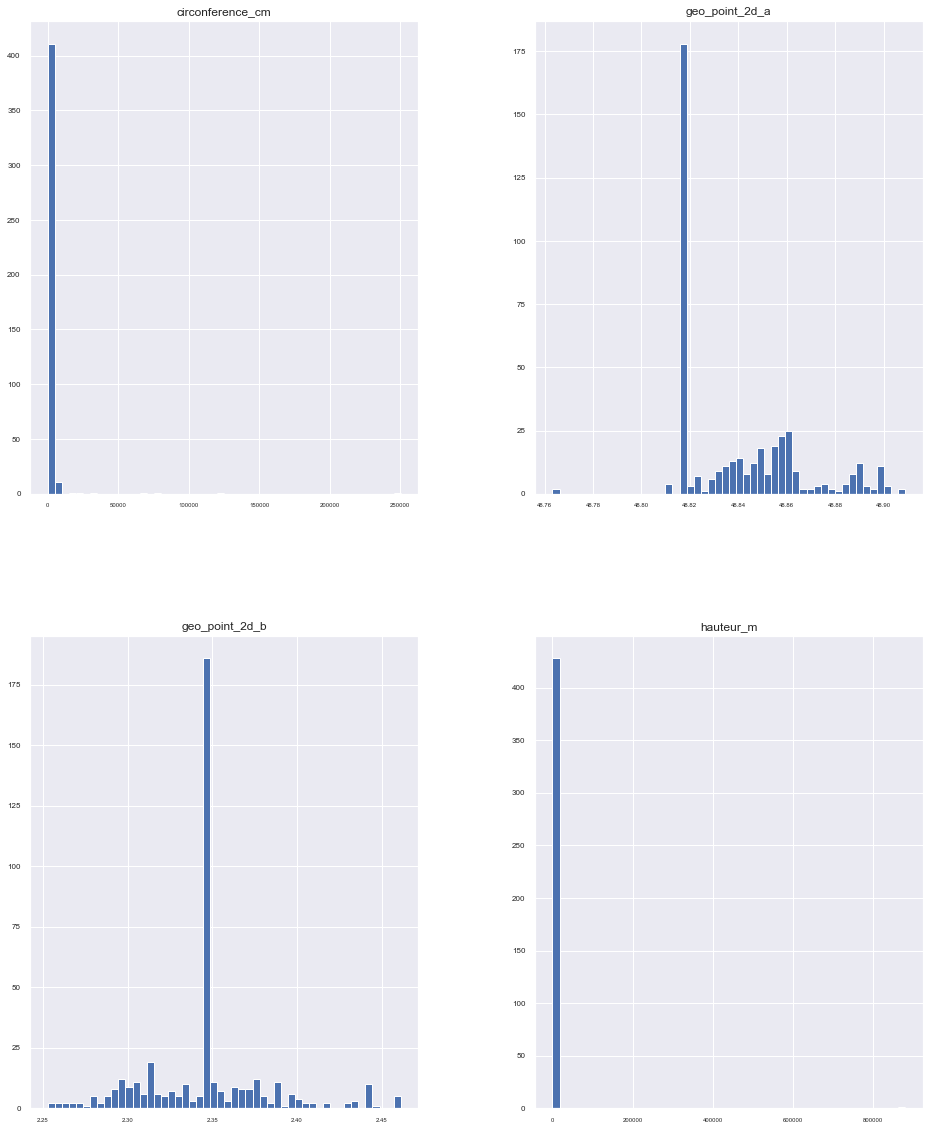

In [21]:
data_df_num_aut_1.hist(figsize=(16, 20), bins=50, xlabelsize=6, ylabelsize=8)

# 3. Analyse statistique univarié et corrélation

## a) Variables qualitatives


> Les données qualitatives sont le type_emplacement, domanialite, arrondissement, lieu, id_emplacement, libelle_francais, genre, espece, stade_developpement. Pour l'analyse, seules les colonnes **'type_emplacement','domanialite','arrondissement','genre','stade_developpement' sont conservées**. 

In [22]:
data_df_O = data_df.select_dtypes(include = ['O'])
mycolumns_1 = ['type_emplacement','domanialite','arrondissement','genre','stade_developpement'] 
data_df_O = data_df_O[mycolumns_1]
data_df_O.head()

,type_emplacement,domanialite,arrondissement,genre,stade_developpement
0,Arbre,Jardin,PARIS 7E ARRDT,Aesculus,A
1,Arbre,Jardin,PARIS 7E ARRDT,Taxus,A
2,Arbre,Jardin,PARIS 7E ARRDT,Taxus,A
3,Arbre,Jardin,PARIS 7E ARRDT,Acer,A
4,Arbre,Jardin,PARIS 17E ARRDT,Tetradium,A


* Affichage de Count Plots

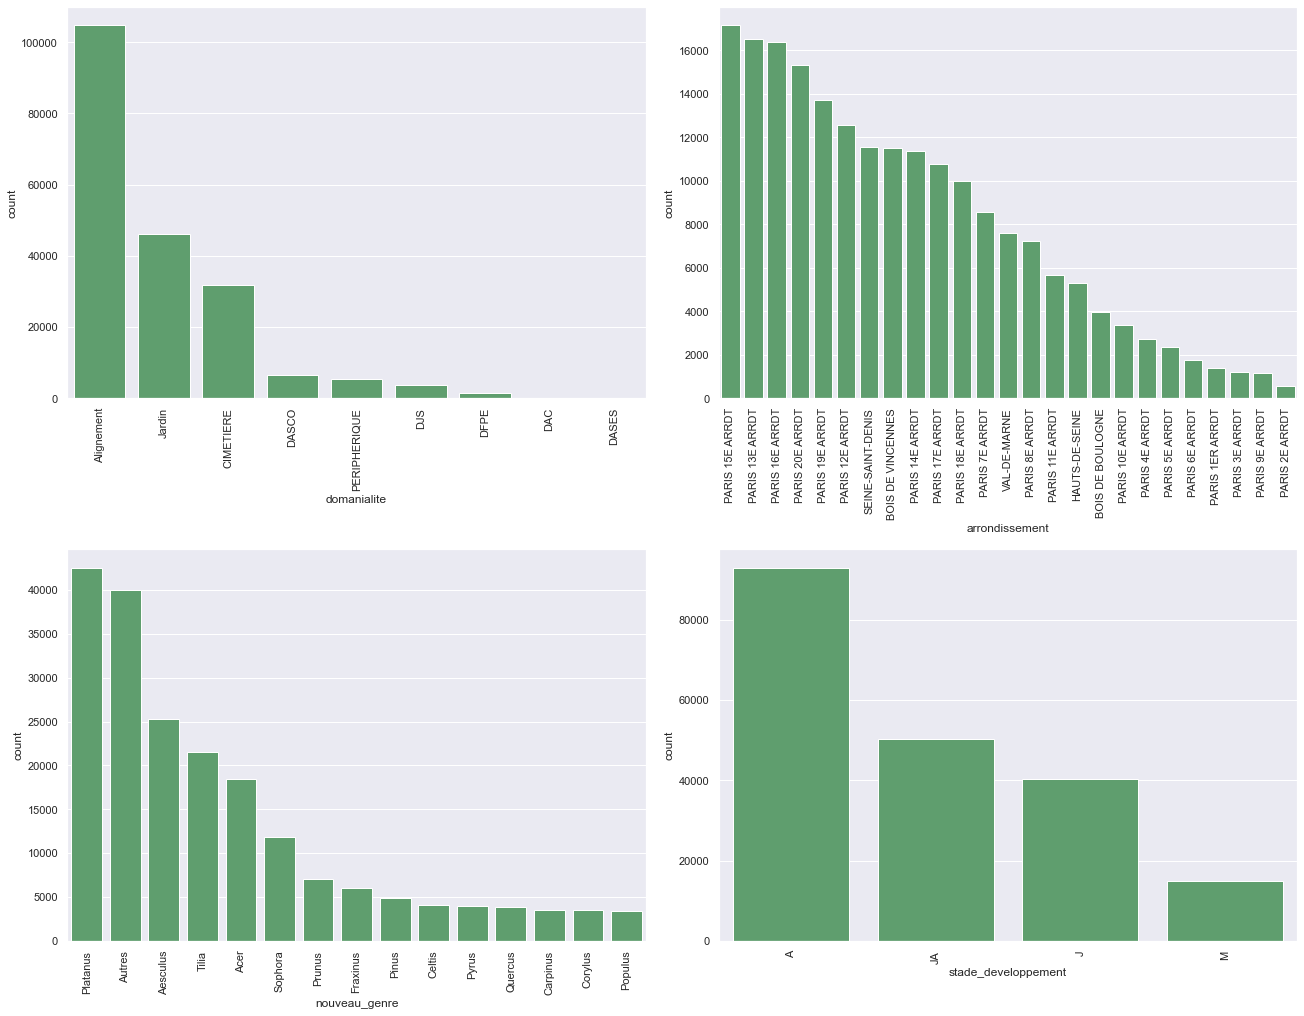

In [23]:
top_genre = ['Platanus','Aesculus','Tilia','Acer','Sophora','Prunus','Fraxinus','Pinus','Celtis','Pyrus','Quercus','Carpinus','Corylus','Populus']
subset = data_df_O['genre']
for i in data_df_O.index: 
    if data_df_O['genre'][i] not in top_genre:
        subset[i] = "Autres" 

categorical_vars = ['domanialite','arrondissement','nouveau_genre','stade_developpement']
data_df_O_new = data_df_O.insert(3,"nouveau_genre",subset.values,True)
data_df.insert(7,"nouveau_genre",subset.values,True)
data_df_O_new = data_df_O

nb_plot  = len(categorical_vars)
tot_cols = 2
tot_rows = nb_plot//tot_cols 
fig, axs = plt.subplots(nrows=tot_rows, ncols=tot_cols, figsize=(9*tot_cols, 7*tot_rows), constrained_layout=True)
 

for i, var in enumerate(categorical_vars):
    row  = i//tot_cols
    pos  = i % tot_cols
    plot = sns.countplot(x=var, data=data_df_O_new, ax=axs[row][pos],color='g',order = data_df_O_new[var].value_counts().index)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

> <font color='red'>CONCLUSION</font>


> <font color='red'> Les graphiques countplot nous montrent que la grande majorité des arbres se trouvent dans les alignements, les jardins et les cimetières.</font>

> <font color='red'> Les arrondissements 15, 13, 16, 20, 19 et 12 concentrent le plus grands nombres d'arbres de Paris.</font>

> <font color='red'> Les genres d'arbre prédominants sont le Platanus,'Aesculus','Tilia','Acer'. Quant au stade de développement, les arbres adultes et jeunes sont en majorité.</font>

## b) Variables quantitatives


> Les données quantitatives sont **circonference_cm, hauteur_m, remarquable, geo_point_2d_a, geo_point_2d_b**

* Affichons les distributions de ces données à l'aide de **kdeplot()** qui affiche la densité de probabilité
  de variable continue :

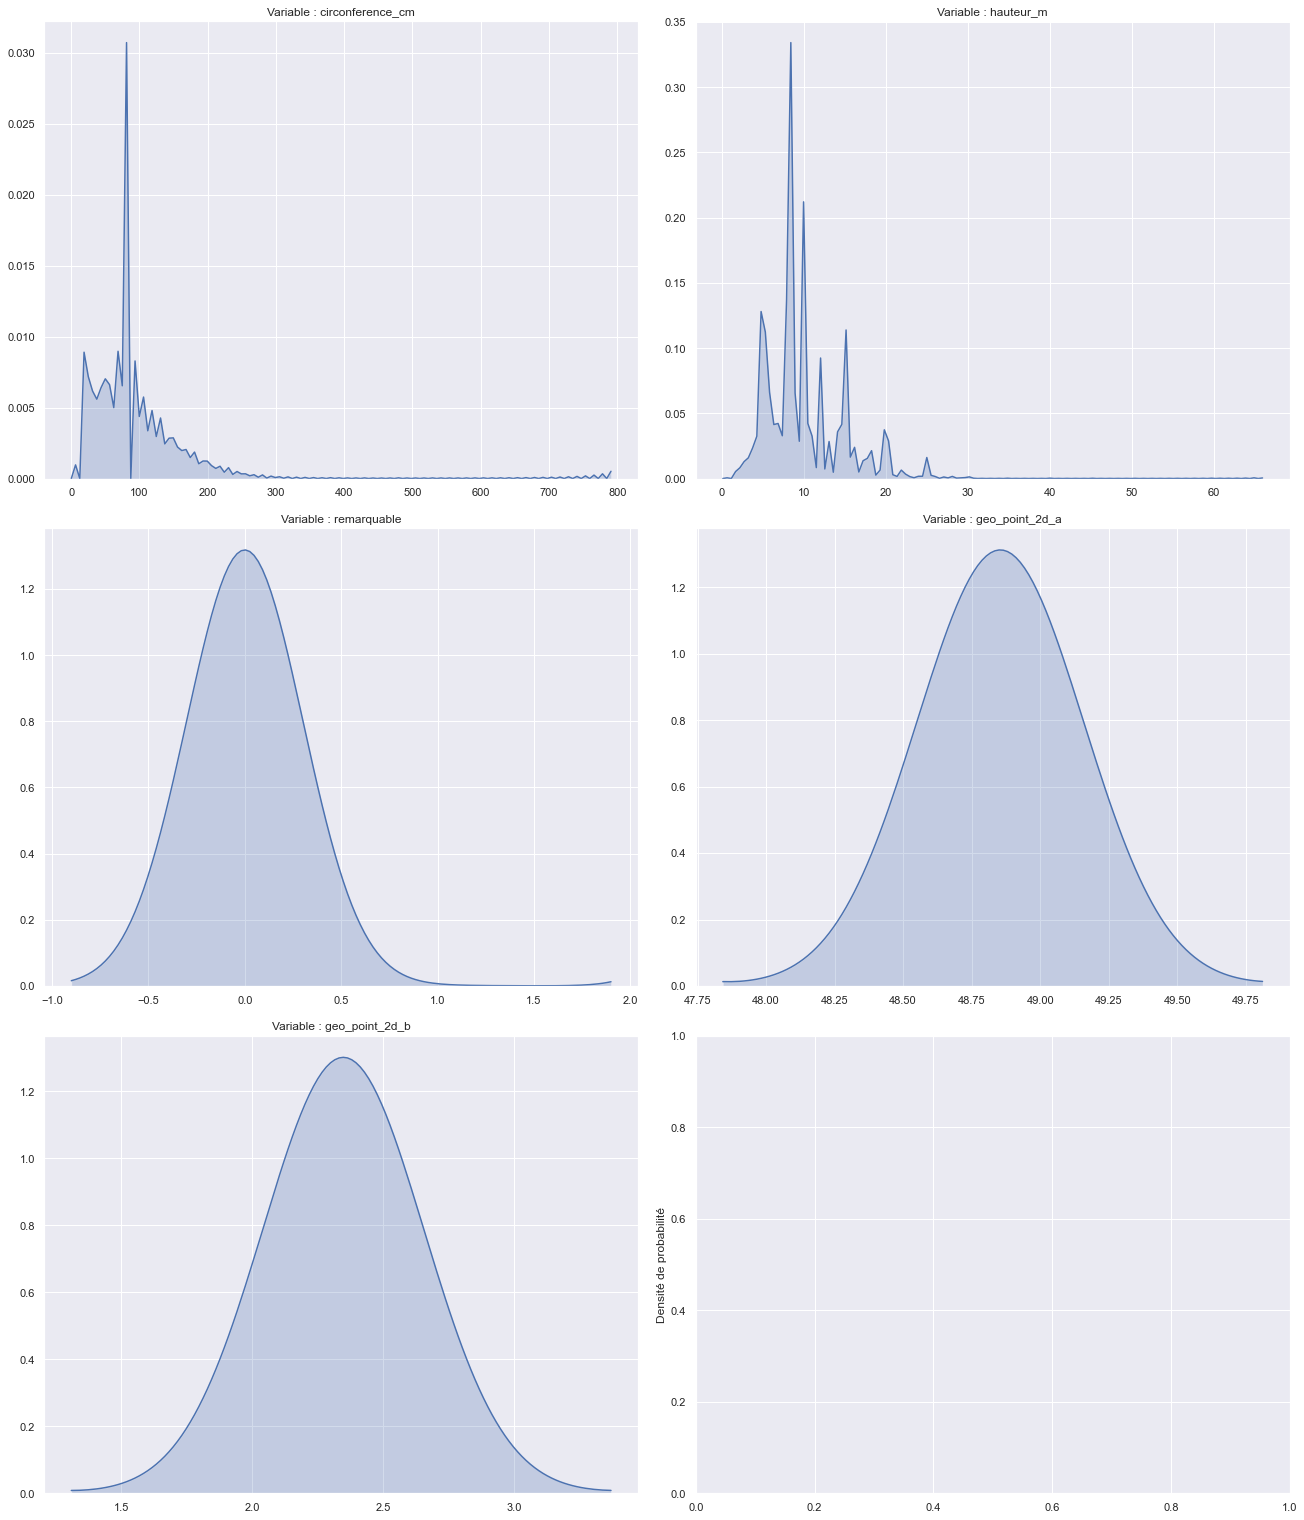

In [24]:
numerical_vars = ['circonference_cm','hauteur_m','remarquable','geo_point_2d_a','geo_point_2d_b']

nb_plot  = len(numerical_vars)
tot_cols = 2
tot_rows = nb_plot//tot_cols + 1
fig, axs = plt.subplots(nrows=tot_rows, ncols=tot_cols, figsize=(9*tot_cols, 7*tot_rows), constrained_layout=True)

for i, var in enumerate(numerical_vars):
    row  = i//tot_cols
    pos  = i % tot_cols
    mean = data_df_num[var].mean()
    std = data_df_num[var].std()
    ax = sns.kdeplot(data_df_num[var].values, color='b', shade=True,bw=0.3,ax=axs[row, pos])
    axs[row, pos].set_title(f'Variable : {var}')
    plt.ylabel('Densité de probabilité')
plt.show()

> <font color='red'>CONCLUSION</font>


> <font color='red'> Les données **geo_point_2d_a, et geo_point_2d_b** ont la même distribution normale ce qui signifie qu'un maximum d'arbres se trouvent localisés dans une zone (2*ecart-type). De même pour la donnée remarquable qui est centré sur 0.</font>

> <font color='red'> La circonférence et la hauteur ont la même distribution. Cela nous donne une indication sur leur corrélation. 

---


## c) Corrélation entre variables ##

* Corrélation entre variables quantitatives

> Dans un premier temps, examinons la correlation de la hauteur avec les autres variables numériques
  en déterminant le coefficient de corrélation de Pearson :

In [25]:
data_df_num.corr()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
circonference_cm,1.000000,0.741702,0.110078,-0.004692,0.006237
hauteur_m,0.741702,1.000000,0.060189,0.005444,0.000848
remarquable,0.110078,0.060189,1.000000,0.002577,-0.009693
geo_point_2d_a,-0.004692,0.005444,0.002577,1.000000,-0.010499
geo_point_2d_b,0.006237,0.000848,-0.009693,-0.010499,1.000000


In [26]:
data_df_num_corr = data_df_num.corr()['hauteur_m'][:-4]
list_var_corr = data_df_num_corr[abs(data_df_num_corr) > 0.5].sort_values(ascending=False)
print("Il y a {} variables fortement correlées avec la hauteur:\n{}".format(len(list_var_corr), list_var_corr))

Il y a 1 variables fortement correlées avec la hauteur:
circonference_cm    0.741702
Name: hauteur_m, dtype: float64


> On affiche les corrélations à l'aide de **pairplot**.

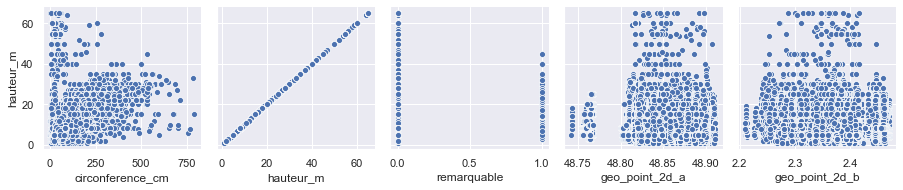

In [27]:
for i in range(0, len(data_df_num.columns), 5):
    sns.pairplot(data=data_df_num,
                x_vars=data_df_num.columns[i:i+5],
                y_vars=['hauteur_m'])

> On affiche les corrélations et un modèle de régression linéaire à l'aide de **regplot**.

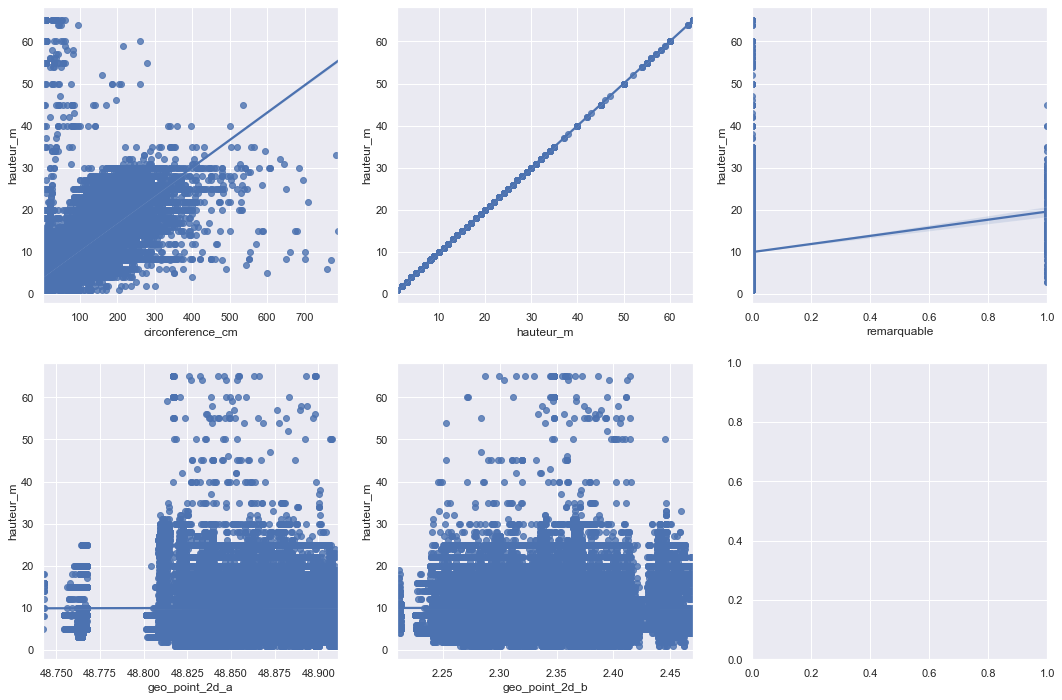

In [28]:
fig, ax = plt.subplots(round(len(numerical_vars) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(numerical_vars):
        sns.regplot(x=numerical_vars[i],y='hauteur_m', data=data_df_num[numerical_vars], ax=ax)

> <font color='red'>CONCLUSION</font>

> <font color='red'> La circonférence et la hauteur sont correlées car le coefficient de Pearson est proche de 1.</font>

* Corrélation entre variables quantitatives et qualitatives

> Examinons maintenant les éventuelles corrélations entre la hauteur et les variables qualitatives dans **data_df_O** :

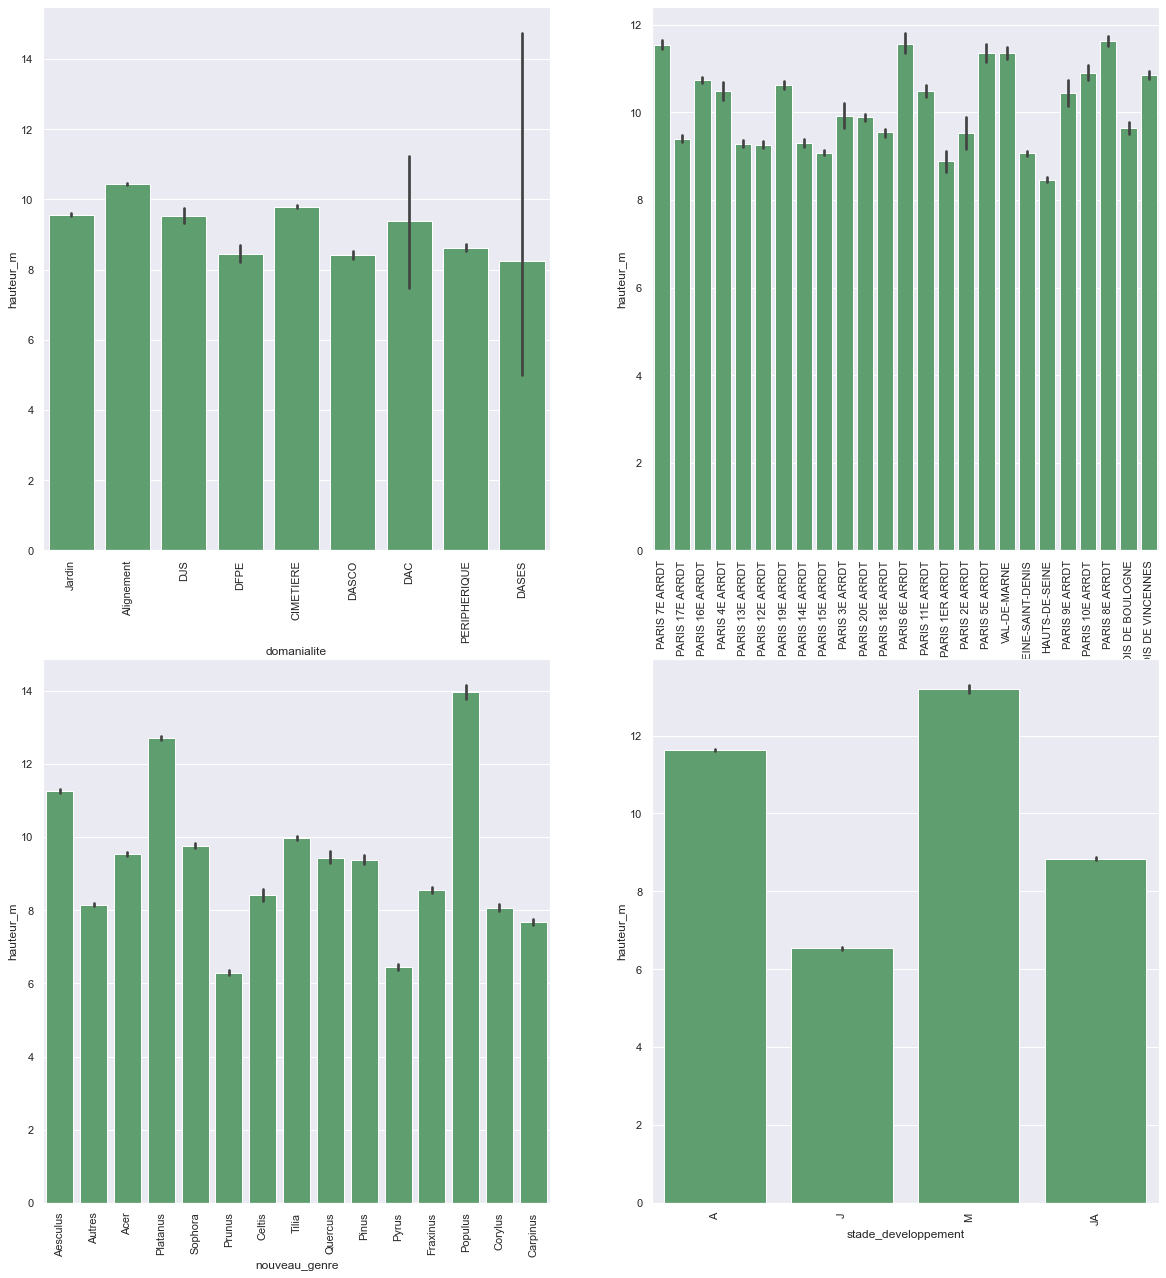

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (20,22))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_vars):
        plot = sns.barplot(x=categorical_vars[i],y='hauteur_m', data=data_df, ax=ax,color='g')
        plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

> Examinons maintenant les éventuelles corrélations entre la circonférence et les variables qualitatives dans **data_df_O** :

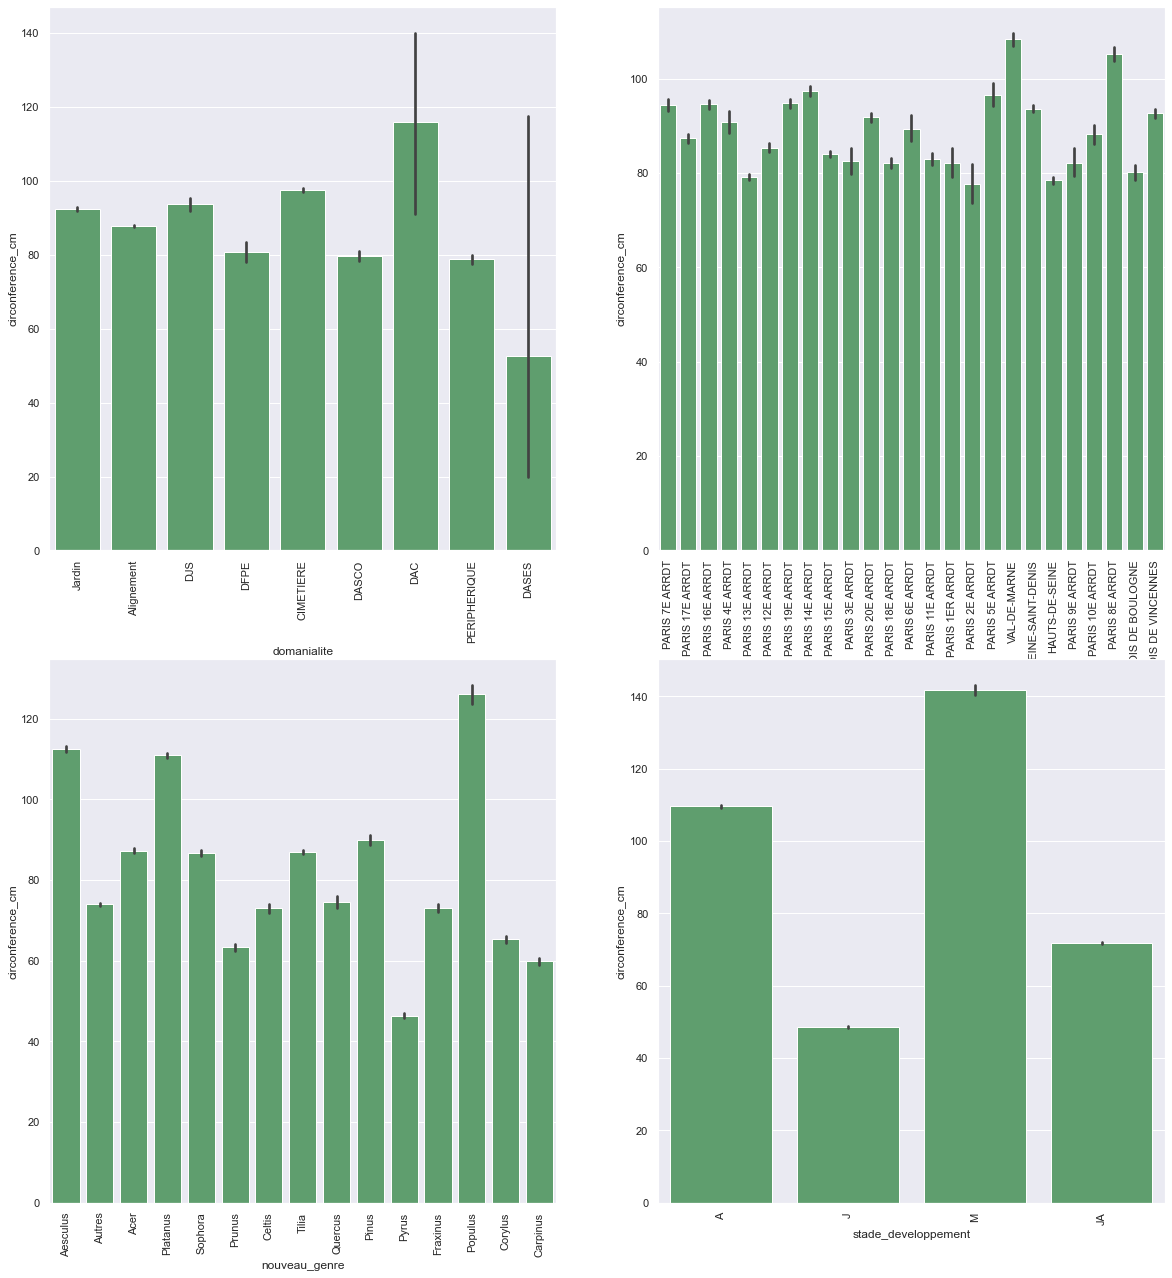

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (20,22))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_vars):
        plot = sns.barplot(x=categorical_vars[i],y='circonference_cm', data=data_df, ax=ax,color='g')
        plot.set_xticklabels(plot.get_xticklabels(),rotation=90)


> <font color='red'>CONCLUSION</font>


> <font color='red'>La répartition géographique des hauteurs et circonférences selon les arrondissement, les latitudes et longitudes permettent d'optimiser les tournées d'entretien.</font>
---

# 4. Synthèse

> Dans le cadre du programme **Végétalisons la ville**, il faut optimiser les tournées d'entretien
  des arbres de la ville. Pour cela, nous allons présenter <font color='red'>les répartitions géographiques de la hauteur des arbres ainsi que la circonférence, le genre de l'arbre, son stade de développement, sa domanialité et son caractère remarquable</font>. 
  En effet, ces caractéristiques déterminent le type de matériels nécessaires à l'entretien des arbres (exemple    des nacelles élevatrices pour les grands arbres, arrosage et élagage des jeunes arbres, protection des espèces sensibles au froid telle que le cèdre, traitement particulier pour les arbres remarquables,...), ce qui permet de prévoir le matériel des jardiniers de la ville pour chaque tournée d'entretien. 
  

## a) Répartition géographiques des hauteurs

> Rappelons que les arrondissements <font color='red'>**15,13,16,20,19,12, la Seine-Saint-Denis, le bois De Vincennes et le 14e arrondissement**</font> regroupent près des 2/3 des arbres de Paris.


* Point géographique 2d (latitude,longitude):

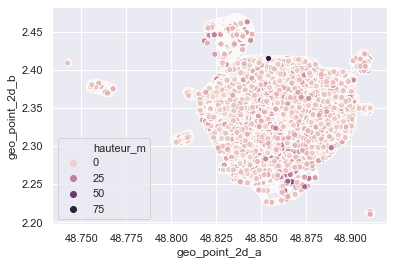

In [31]:
plot = sns.scatterplot(data=data_df, x="geo_point_2d_a", y="geo_point_2d_b",hue='hauteur_m')

* Arrondissement

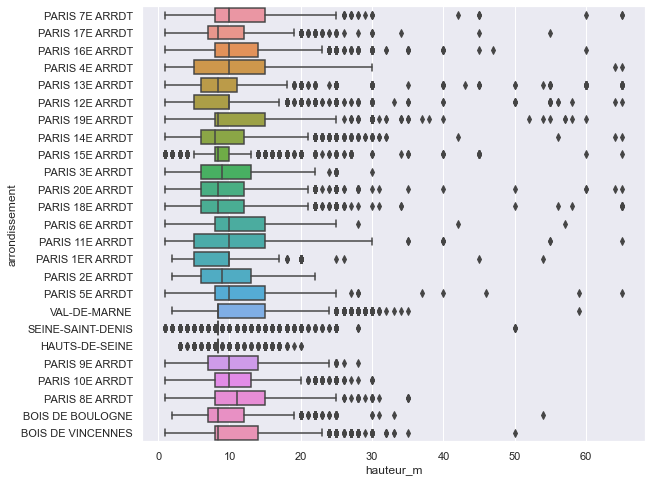

In [32]:
plt.figure(figsize = (9, 8))
plot = sns.boxplot(x="hauteur_m", y="arrondissement", data=data_df)

In [33]:
nb_tot_haut_inf30 = data_df[data_df.remarquable < 30]['hauteur_m'].value_counts()

pct_haut_inf30    = (nb_tot_haut_inf30 / data_df.shape[0]) * 100
print(pct_haut_inf30)

8.354536     19.637868
10.000000    14.328563
5.000000     13.190390
15.000000     8.622175
8.000000      6.822529
12.000000     5.514106
6.000000      5.277758
20.000000     3.745506
7.000000      3.399998
4.000000      2.411545
9.000000      2.361471
18.000000     2.051015
14.000000     1.986420
16.000000     1.674962
13.000000     1.508718
11.000000     1.496700
3.000000      1.496199
25.000000     1.045537
17.000000     0.897820
2.000000      0.721561
22.000000     0.555316
1.000000      0.224831
19.000000     0.218822
28.000000     0.114168
30.000000     0.111664
24.000000     0.109160
23.000000     0.102150
21.000000     0.080118
26.000000     0.075110
27.000000     0.071605
29.000000     0.037555
65.000000     0.014521
35.000000     0.012518
40.000000     0.011517
60.000000     0.011016
45.000000     0.009514
55.000000     0.008513
31.000000     0.007511
50.000000     0.006510
32.000000     0.005508
34.000000     0.004006
33.000000     0.002504
56.000000     0.002003
64.000000  

* <font color='red'> ANALYSE </font>

>  Les graphiques montrent bien que les hauteurs sont majoritairement inférieures à 30m et localisées entre les    latitudes 48.825 et 48.9, et les longitudes entre 2.25 et 2.40. Les plus grands arbres (> 30m) restent très localisés autour du point 48.862 et 2.26 ce qui permet d'anticiper le matériel à utiliser lors des tournées autour de ce point particulier. En effet, l'élagage, la coupe des branches ou des pousses inutiles ainsi que les fleurs fanées demandent plus de temps pour les grands arbres qui nécessitent des nacelles élevatrices. L'alternative consiste à prévoir des grimpeurs capables de progresser en hauteur àl'aide de harnais, de cordes et de noeuds.

> De plus, on remarque que les hauteurs en Seine-Saint-Denis et dans les Hauts-De-Seine sont très proches et inférieures à 20m, donc il n'est pas nécessaire de prendre du matériel spécifique aux grands arbres. Idem pour le 15e arrondissement avec une boite à moustache petite. Ces arrondissement possèdent une médiane des hauteurs inférieures à 10m.

> Les intervalles des hauteurs dans le 4e et 11e arrondissement sont les plus grandes ce qui signifie qu'on a plus d'arbres de hauteur différente.  


## b) Répartition géographiques des circonférences

* Point géographique 2d:


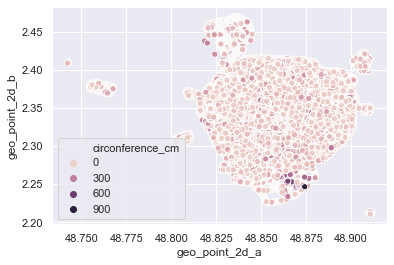

In [34]:
plot = sns.scatterplot(data=data_df, x="geo_point_2d_a", y="geo_point_2d_b",hue='circonference_cm')

* Arrondissement :

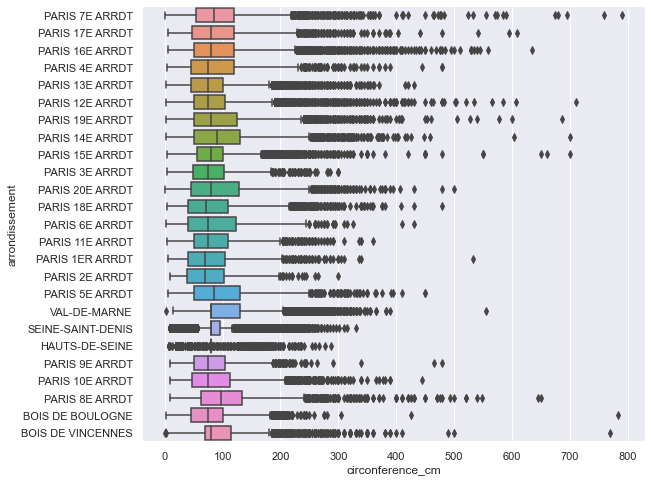

In [35]:
plt.figure(figsize = (9, 8))
plot = sns.boxplot(x="circonference_cm", y="arrondissement", data=data_df)

* <font color='red'> ANALYSE </font>

> La répartition des circonférences présente les mêmes caractéristiques que la hauteur. En effet, Les graphiques montrent bien que les circonférences sont majoritairement inférieures à 300cm et localisées entre les latitudes 48.825 et 48.9, et les longitudes entre 2.25 et 2.40. Les plus gros arbres (> 300cm) restent très localisés autour du point 48.862 et 2.26 ce qui permet d'anticiper le matériel à utiliser et le temps d'entretien lors des tournées autour de ce point particulier. En effet, l'élagage, la coupe des branches ou des pouces inutiles ainsi que les fleurs fanées demandent plus de temps pour les gros arbres.

> De plus, on remarque que les circonférences en Seine-Saint-Denis et dans les Hauts-De-Seine sont très proches et inférieures à 300cm, donc il n'est pas nécessaire de prendre du matériel spécifique aux gros arbres. Idem pour le 15e arrondissement avec une boite à moustache petite. Ces arrondissement possèdent une médiane des hauteurs inférieures à 10m.

> Les intervalles des circonférences dans le 4e,20e et 5e arrondissement sont les plus grandes ce qui signifie qu'on a plus d'arbres de largeur différente.   

## c) Répartition géographiques en fonction du stade de développement

* Point géographique 2d :

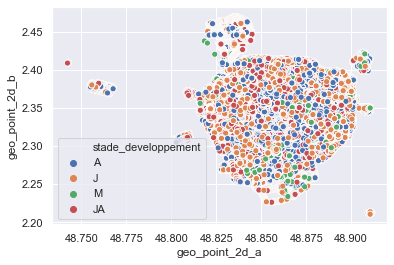

In [36]:
plot = sns.scatterplot(data=data_df, x="geo_point_2d_a", y="geo_point_2d_b",hue='stade_developpement')

* Arrondissement à l'aide du tableau de contingence coloré : 

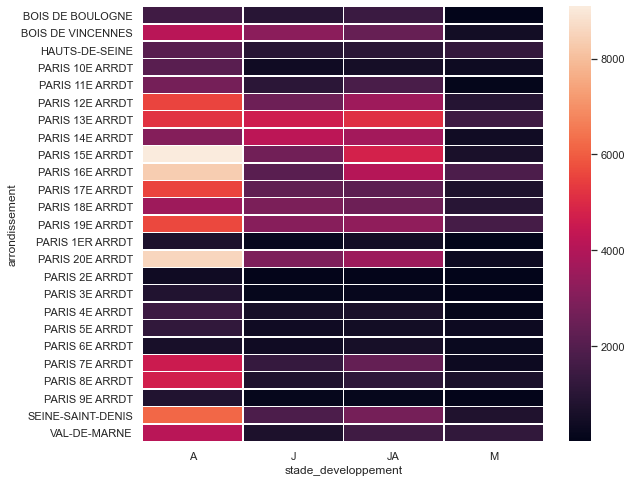

In [37]:
plt.figure(figsize = (9, 8))
tab_cont_sta_dev = data_df[["arrondissement","stade_developpement"]].pivot_table(index="arrondissement", columns="stade_developpement",aggfunc=len)
plot = sns.heatmap(tab_cont_sta_dev,linewidths=.5)

* <font color='red'> ANALYSE </font>

>  Ces graphiques nous indiquent l'emplacement des plus jeunes arbres J qui nécessitent une plus grande fréquence d'entretien. Etant plus fragiles, ils nécessitent un arrosage fréquents, des protections contre le froid, mise en place d'un guide pour la pousse. Ces jeunes arbres sont nombreux dans le 13e et 14e arrondissement et beaucoup moins nombreux dans les arrondissements 2,3,4,5,6. De même pour les arbres au stade 'JA'.

> Pour les arbres adulte de stade 'A', on note une forte présence dans les arrondissements 15,16 et 20, ce ui nécessite moins de déplacements dans ces endroits car les arbres demandent moins d'entretien donc moins de déplacements.

> Les arbres matures 'M' sont beaucoup moins nombreux et ce dans tous les arrondissements comme l'indique la coloration noire.



## d) Répartition géographiques en fonction de la donnée remarquable

* Point géographique 2d :

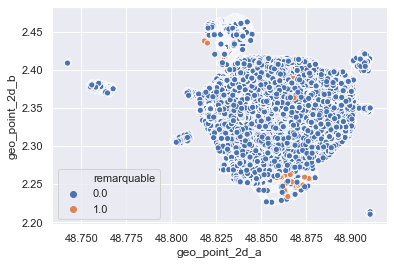

In [38]:
plot = sns.scatterplot(data=data_df, x="geo_point_2d_a", y="geo_point_2d_b",hue='remarquable')

* Arrondissement : 

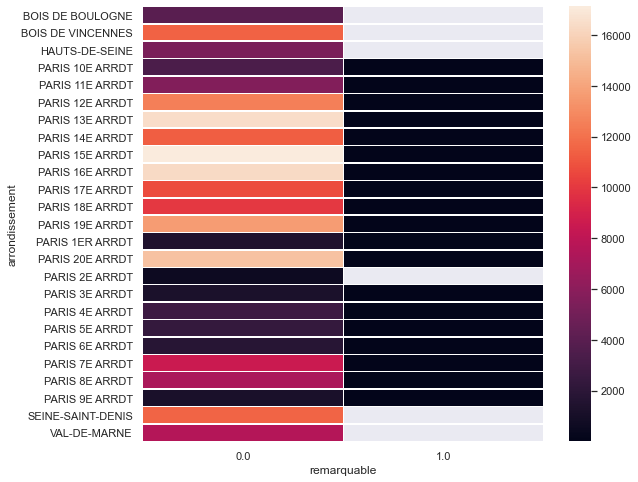

In [39]:
plt.figure(figsize = (9, 8))
tab_cont_sta_dev = data_df[["arrondissement","remarquable"]].pivot_table(index="arrondissement", columns="remarquable",aggfunc=len)
plot = sns.heatmap(tab_cont_sta_dev,linewidths=.5)

* <font color='red'> ANALYSE </font>

> La majorité des arbres ne sont pas remarquables. 

> Les arbres remarquables sont plus nombreux dans le 16e et 12e arrondissement. 

> La Seine-Saint-Denis, le Val-De-Marne, le 2e arrondissement,les bois de Boulogne, de Vincennes et les Hauts-De-Seine n'ont pas d'arbres remarquables donc ne nécessitent pas de matériels ou de traitements particuliers lors des déplacements dans ce zones. 

## e) Répartition géographiques en fonction du nouveau_genre

* Point géographique 2d :

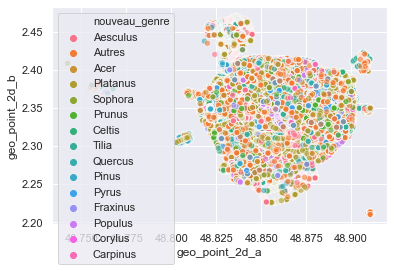

In [40]:
plot = sns.scatterplot(data=data_df, x="geo_point_2d_a", y="geo_point_2d_b",hue='nouveau_genre',
                       legend="full",alpha=0.6)




* Arrondissement

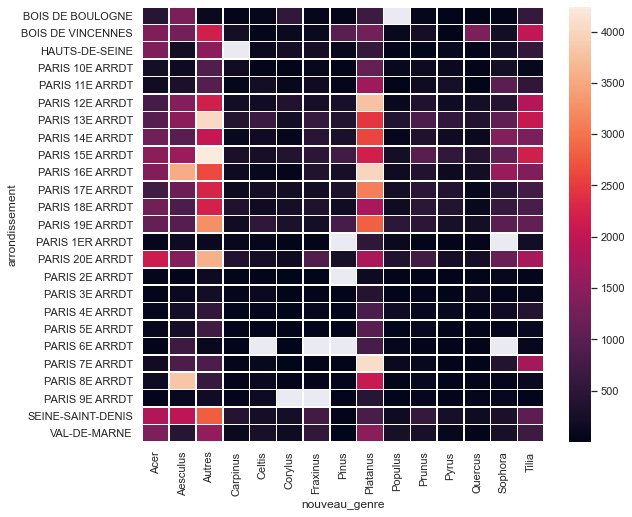

In [41]:
plt.figure(figsize = (9, 8))
tab_cont_sta_dev = data_df[["arrondissement","nouveau_genre"]].pivot_table(index="arrondissement", columns="nouveau_genre",aggfunc=len)
plot = sns.heatmap(tab_cont_sta_dev,linewidths=.5)

* <font color='red'> ANALYSE </font>

> Les arbres telles que les platanes, les marroniers, les hêtres, les tilleuls sont les plus nombreux et ne nécessitent aucun traitement particulier. 
D'autres arbres tels que les châtaigniers (points verts) nécessitent un arrosage contrôlé. 
**Le Platanus** est en nombre important dans le 7e, 16 et 12e arrondissement alors que le genre **Aesculus** est très présent dans le 8e,20e,13e et 15e arrondissement.

> La connaissance de la répartition géographique des différents types d'arbre permet d'anticiper le matériel et l'organisation à prendre pour les tournées d'entretien.

## f) Répartition géographiques en fonction de la domanialité

* Point géographique 2d :

/Users/reguiloubna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


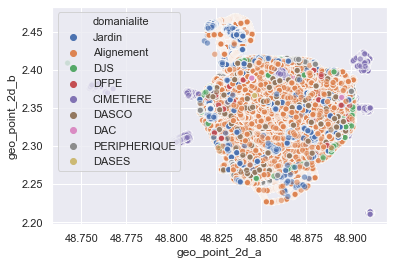

In [42]:
plot = sns.scatterplot(data=data_df, x="geo_point_2d_a", y="geo_point_2d_b",hue='domanialite',alpha=0.6)

* Arrondissement

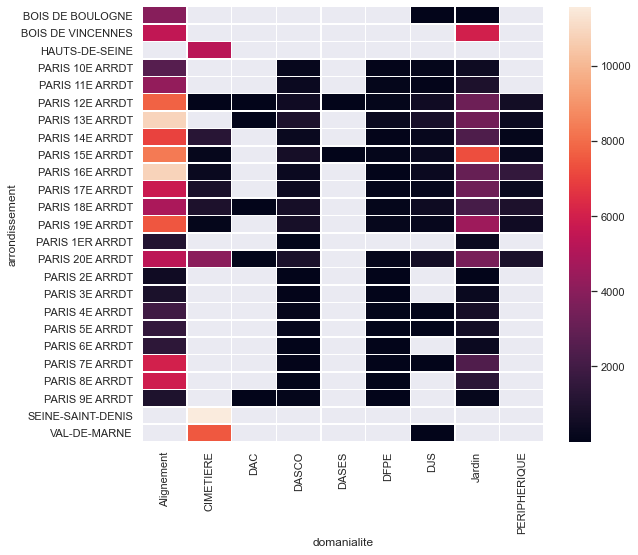

In [43]:
plt.figure(figsize = (9, 8))
tab_cont_sta_dev = data_df[["arrondissement","domanialite"]].pivot_table(index="arrondissement", columns="domanialite",aggfunc=len)
plot = sns.heatmap(tab_cont_sta_dev,linewidths=.5)

* <font color='red'> ANALYSE </font>

> On observe que seulement 4 arbres sont présents dans les DASES et que les endroits tels que les DASCO, DAC, DFPE, DJS et le périphérique ne contiennent que peu d'arbres. L'entretien dans une zone telle que le périphérique nécessite des précautions telles que la sécurisation des jardiniers en raison de la circulation.

> La grande majorité des arbres de Paris se trouvent dans les alignements ainsi que les cimetières et les jardins.
Les arbres se trouvant dans des alignements peuvent être proches des routes de circulation ou des trottoirs donc la mise en place d'un périmètre de sécurité est nécessaire pour les entretenir.  

## g) Affichage du stade de développement dans le 2e arrondissement du genre Aesculus

In [92]:
import folium
from ipywidgets import interact, interactive
from IPython.display import display
import ipywidgets as widgets

data_df.columns =[column.replace(" ", "_") for column in data_df.columns]
data_df_folium = data_df.query('nouveau_genre == "Aesculus" and arrondissement == "PARIS 2E ARRDT"')

unique_stade = data_df_folium.stade_developpement.unique()

w = widgets.RadioButtons(
    options=unique_stade.tolist(),
    description='Stade:',
    disabled=False
)

def affiche_map(stade_developpement):
    filter1 = data_df_folium["stade_developpement"].isin([stade_developpement])
    data_df_folium[filter1] 
    colors = {'A' : 'blue', 'J' : 'orange','M' : 'green', 'JA' : 'red'}
    m = folium.Map(location=[48.86, 2.34],zoom_start=14)
    data_df_folium[filter1].apply(lambda row:folium.CircleMarker(location=[row["geo_point_2d_a"], 
                                                  row["geo_point_2d_b"]],fill_color=colors.get(stade_developpement),popup=stade_developpement).add_to(m),axis=1)
    display(m)
    
    


widgets.interactive(affiche_map, stade_developpement= w)

interactive(children=(RadioButtons(description='Stade:', options=('A', 'JA'), value='A'), Output()), _dom_clas…

## h) Affichage de la domanialité dans le 2e arrondissement du genre Aesculus

In [93]:

unique_dom = data_df_folium.domanialite.unique()

y = widgets.RadioButtons(
    options=unique_dom.tolist(),
    description='Domanialité:',
    disabled=False
)

def affiche_map_dom(domaine):
    filter2 = data_df_folium["domanialite"].isin([domaine])
    data_df_folium[filter2] 
    colors = {'Jardin' : 'black', 'Alignement' : 'red','DASCO' : 'green'}
    m = folium.Map(location=[48.86, 2.34],zoom_start=14)
    data_df_folium[filter2].apply(lambda row:folium.CircleMarker(location=[row["geo_point_2d_a"], 
                                                  row["geo_point_2d_b"]],fill_color=colors.get(domaine),popup=domaine).add_to(m),axis=1)
    display(m)
    
    
widgets.interactive(affiche_map_dom, domaine= y)

interactive(children=(RadioButtons(description='Domanialité:', options=('Jardin', 'DASCO', 'Alignement'), valu…